In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import joblib

In [2]:
# Load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
column_names = ['Class', 'ID', 'Sequence']
data = pd.read_csv(url, names=column_names)

In [3]:
# Display the first few rows of the data
print("Original Data:")
data.head()

Original Data:


,Class,ID,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [4]:
# Data Preprocessing
# Remove tabs from sequences and create a dictionary
sequence_dict = {}
for i, (class_label, seq) in enumerate(zip(data['Class'], data['Sequence'])):
    nucleotides = [char for char in seq if char != '\t']
    nucleotides.append(class_label)
    sequence_dict[i] = nucleotides

In [5]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(sequence_dict, orient='index')

In [6]:
# Set the last column as 'Class' and the rest as nucleotide positions
df.columns = [f'Pos_{i}' for i in range(len(df.columns) - 1)] + ['Class']

print("Processed Data:\n")
df.head()

Processed Data:



,Pos_0,Pos_1,Pos_2,Pos_3,Pos_4,Pos_5,Pos_6,Pos_7,Pos_8,Pos_9,...,Pos_48,Pos_49,Pos_50,Pos_51,Pos_52,Pos_53,Pos_54,Pos_55,Pos_56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [7]:
# Prepare for one-hot encoding
X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

In [10]:
# Create a DataFrame with encoded features
feature_names = encoder.get_feature_names_out(X.columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

print("\nEncoded Data:")
print(X_encoded_df.head())


Encoded Data:
   Pos_0_a  Pos_0_c  Pos_0_g  Pos_0_t  Pos_1_a  Pos_1_c  Pos_1_g  Pos_1_t  \
0      0.0      0.0      0.0      1.0      1.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      1.0      0.0      0.0      1.0      0.0   
2      0.0      0.0      1.0      0.0      0.0      0.0      0.0      1.0   
3      1.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
4      0.0      0.0      0.0      1.0      0.0      1.0      0.0      0.0   

   Pos_2_a  Pos_2_c  ...  Pos_54_g  Pos_54_t  Pos_55_a  Pos_55_c  Pos_55_g  \
0      0.0      1.0  ...       0.0       0.0       0.0       0.0       1.0   
1      0.0      1.0  ...       0.0       0.0       1.0       0.0       0.0   
2      1.0      0.0  ...       1.0       0.0       0.0       1.0       0.0   
3      0.0      0.0  ...       0.0       0.0       0.0       0.0       0.0   
4      0.0      0.0  ...       0.0       1.0       1.0       0.0       0.0   

   Pos_55_t  Pos_56_a  Pos_56_c  Pos_56_g  Pos_56_t  

In [11]:
# Map classes to binary values
y = y.map({'+': 1, '-': 0})

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.25, random_state=1)

In [13]:
# Create and train the model
model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [14]:
# Make predictions
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9259259259259259

In [15]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



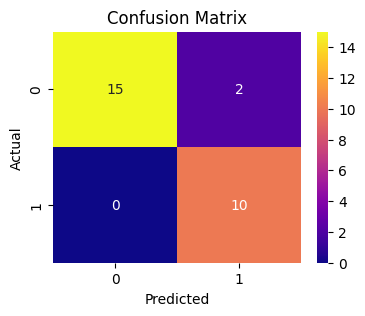

In [16]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

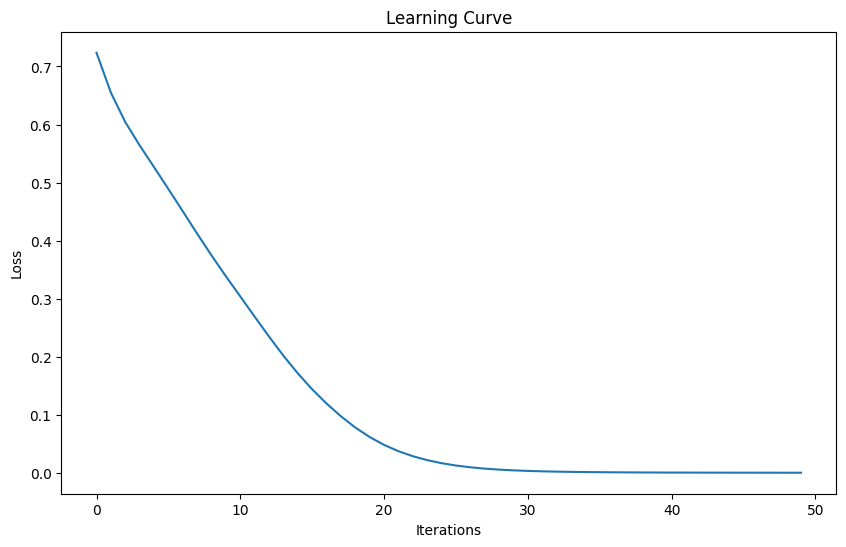

In [17]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [19]:
# Train the final model on the entire dataset
print("\nTraining final model on entire dataset...")
final_model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
final_model.fit(X_encoded_df, y)


Training final model on entire dataset...


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [20]:
# Save the final model and encoder
joblib.dump(final_model, 'ecoli_classifier_final.joblib')
joblib.dump(encoder, 'ecoli_encoder.joblib')
print("Final model and encoder saved.")

Final model and encoder saved.


In [23]:
# Example of using the final model for prediction
sample_sequence = "ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaac"
sample_df = pd.DataFrame([list(sample_sequence)], columns=[f'Pos_{i}' for i in range(len(sample_sequence))])

In [24]:
# Use the same encoder for the sample sequence
sample_encoded = encoder.transform(sample_df)
sample_encoded_df = pd.DataFrame(sample_encoded, columns=feature_names)

In [25]:
# Ensure the sample has the same columns as the training data
for col in X_encoded_df.columns:
    if col not in sample_encoded_df.columns:
        sample_encoded_df[col] = 0
sample_encoded_df = sample_encoded_df.reindex(columns=X_encoded_df.columns, fill_value=0)

In [30]:
# Verify that the shapes match
print(f"\nTraining data shape: {X_encoded_df.shape}")
print(f"Sample data shape: {sample_encoded_df.shape}")


Training data shape: (106, 228)
Sample data shape: (1, 228)


In [31]:
# Make prediction
prediction = final_model.predict(sample_encoded_df)
print(f"\nPrediction for sample sequence using final model: {'Positive' if prediction[0] == 1 else 'Negative'}")


Prediction for sample sequence using final model: Negative


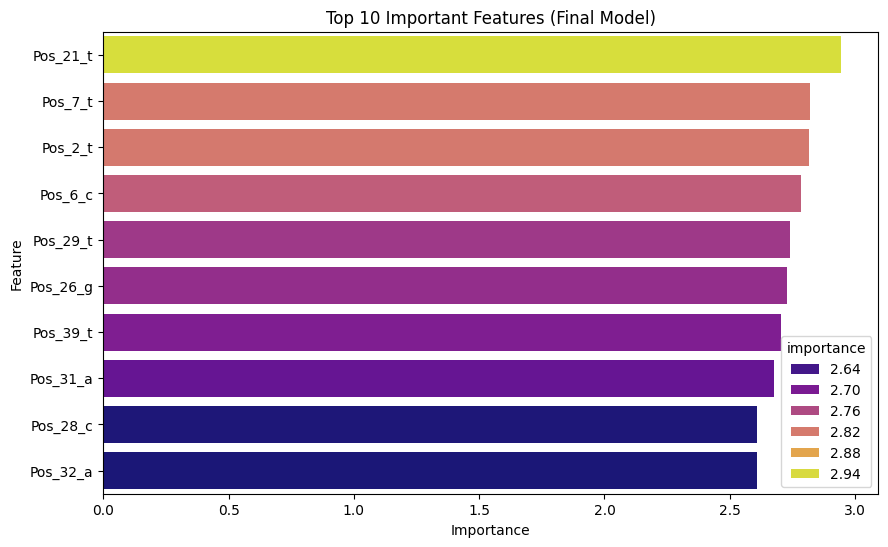

In [29]:
# Examine feature importance for the final model
feature_importance = pd.DataFrame({'feature': X_encoded_df.columns, 'importance': np.abs(final_model.coefs_[0].sum(axis=1))})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, hue='importance', palette='plasma')
plt.title('Top 10 Important Features (Final Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [33]:
# Compare performance metrics between initial and final models
print("\nPerformance comparison:")
print("Initial model accuracy:", model.score(X_test, y_test))
print("Final model accuracy:", final_model.score(X_encoded_df, y))


Performance comparison:
Initial model accuracy: 0.9259259259259259
Final model accuracy: 1.0


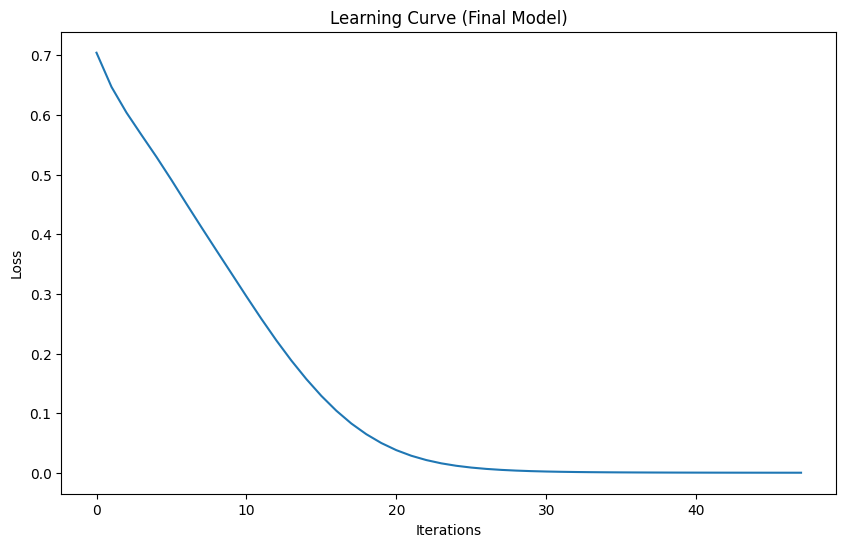

In [34]:
# Plot learning curve for the final model
plt.figure(figsize=(10, 6))
plt.plot(final_model.loss_curve_)
plt.title('Learning Curve (Final Model)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()